<a href="https://colab.research.google.com/github/Varshini2806/DEEP-LEARNING/blob/main/agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

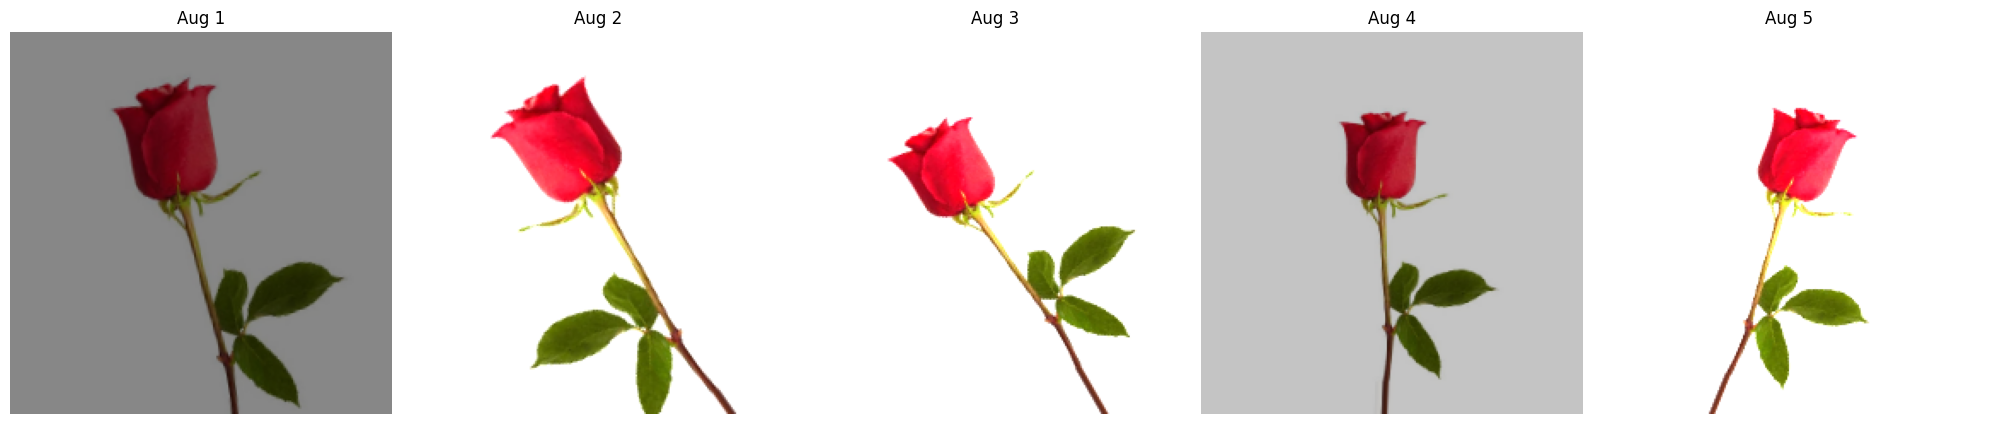


Augmentation Summary Table:


,Image,Rotation,Brightness,Flipped
0,Aug 1,11.6°,0.67x,Yes
1,Aug 2,25.5°,0.98x,No
2,Aug 3,39.5°,0.54x,Yes
3,Aug 4,1.8°,0.61x,Yes
4,Aug 5,41.9°,0.86x,No


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load and preprocess image
img_path = '/content/rose.jpg'
image = load_img(img_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

# Define augmentations
datagen = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    shear_range=0.2,
    horizontal_flip=True
)

# Create data storage
data = {
    "Image": [],
    "Rotation": [],
    "Brightness": [],
    "Flipped": []
}

# Generate and show augmented images with table
i = 0
fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # for 5 images
for batch in datagen.flow(image_array, batch_size=1):
    img = batch[0].astype("uint8")
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"Aug {i+1}")

    # Random simulated values (since ImageDataGenerator doesn’t return the actual applied values)
    data["Image"].append(f"Aug {i+1}")
    data["Rotation"].append(f"{round(random.uniform(0, 45), 1)}°")
    data["Brightness"].append(f"{round(random.uniform(0.5, 1.5), 2)}x")
    data["Flipped"].append(random.choice(["Yes", "No"]))

    i += 1
    if i >= 5:
        break

plt.tight_layout()
plt.show()

# Create and display table
df = pd.DataFrame(data)
print("\nAugmentation Summary Table:")
display(df)
